In [73]:
import pandas as pd
import seaborn as sns
import matplotlib
import os
import re

In [80]:
df = pd.read_csv('/Users/melvinrinkleff/dev/code/22_fall_data_science/code-lu-data-science/names/yob2000.txt',
              names= ['name','gender','count'], header=None)

In [82]:
df['percent'] = (df['count'] / 
                  df['count'].sum()) * 100
df

,name,gender,count,percent
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542
...,...,...,...,...
29771,Zeph,M,5,0.000132
29772,Zeven,M,5,0.000132
29773,Ziggy,M,5,0.000132
29774,Zo,M,5,0.000132


In [83]:
path = '/Users/melvinrinkleff/dev/code/22_fall_data_science/code-lu-data-science/names/'
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


<AxesSubplot:xlabel='year'>

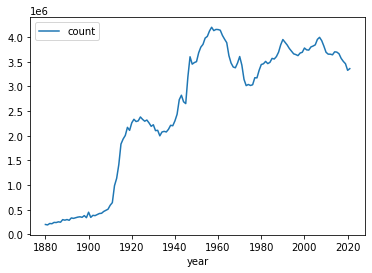

In [56]:
data = []

for year in range(1880, 2022):
    data_temp = [year, df.groupby('year')['count'].sum()[year]]
    data.append(data_temp)
    
df2 = pd.DataFrame(data, columns=['year', 'count'])
df2 = df2.set_index('year')
df2.plot()

/var/folders/mt/c0xfkg7j1rl77dtg76qt7vnc0000gn/T/ipykernel_96357/2164916058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name.fillna(0.0, inplace=True)


<AxesSubplot:xlabel='year'>

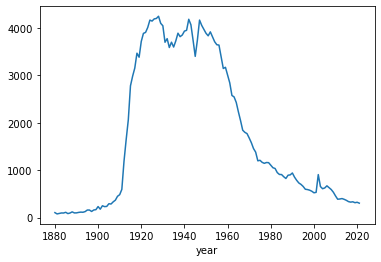

In [69]:
name = df[(df['name'] == 'Melvin') & (df['gender']=='M')]
name.set_index('year', inplace=True)
name = name['count']
name.fillna(0.0, inplace=True)
name.plot()

/Users/melvinrinkleff/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

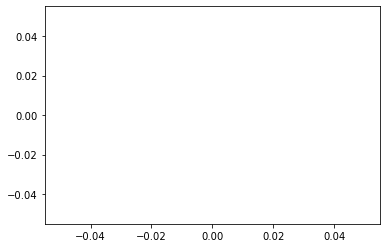

In [84]:
girls = df[df['gender'] == 'F'].set_index('name')

celebrities = girls.loc[['Madonna', 'Frida', 'Leia']]

sns.lineplot(data=celebrities, x='year', y='count', hue='name')

In [85]:
year_total = df.groupby('year')['count'].sum()
year_total.head(3)

year
1880    201484
1881    192690
1882    221533
Name: count, dtype: int64

<AxesSubplot:xlabel='year'>

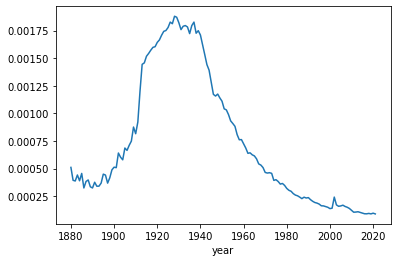

In [86]:
normalized = name / year_total
normalized.plot()